In [156]:
# Neccessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

In [157]:
df=pd.read_csv("./Dataset/Train.csv")
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


# EDA

In [158]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

### As we can see there are some missing values which will need to be filled

In [160]:
df.drop('Employee_ID',axis=1,inplace=True)
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


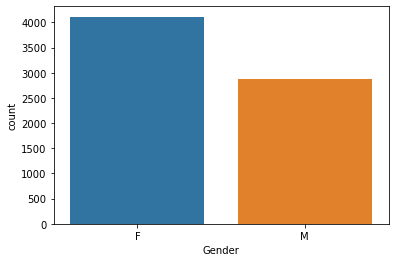

In [161]:
#Countplot visualization for Gender
sns.countplot(x='Gender',data=df)

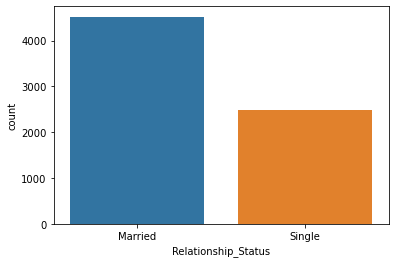

In [162]:
#Countplot visualization for Relationship_status
sns.countplot(x='Relationship_Status',data=df)

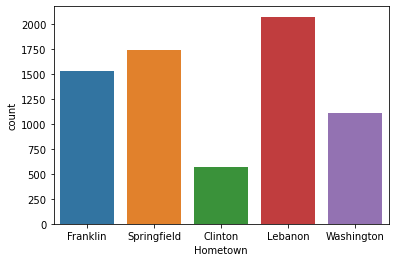

In [163]:
#Countplot visualization for Hometown
sns.countplot(x='Hometown',data=df)

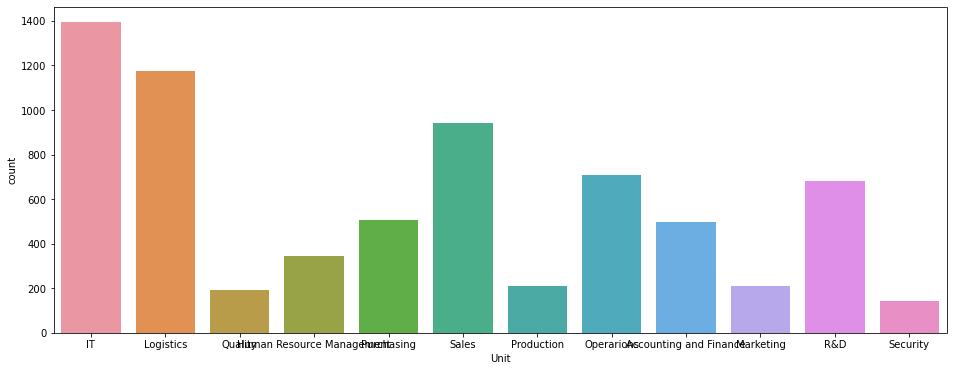

In [164]:
#Countplot visualization for Unit
plt.figure(figsize=(16,6))
sns.countplot(x='Unit',data=df)

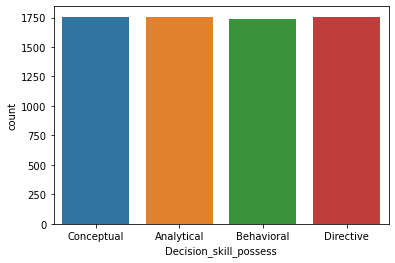

In [165]:
#Countplot visualization for Decision_skill_possess
sns.countplot(x='Decision_skill_possess',data=df)

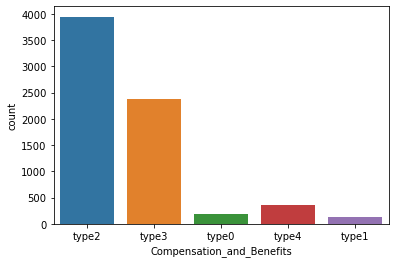

In [166]:
#Countplot visualization for Compensation_and_Benefits
sns.countplot(x='Compensation_and_Benefits',data=df)

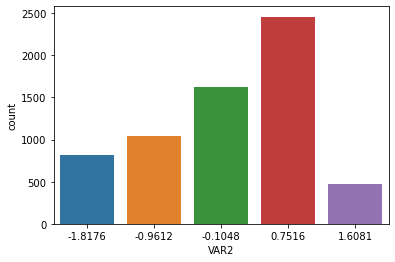

In [167]:
#Countplot visualization for VAR2
sns.countplot(x='VAR2',data=df)

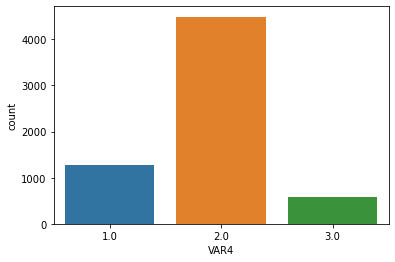

In [168]:
#Countplot visualization for VAR4
sns.countplot(x='VAR4',data=df)

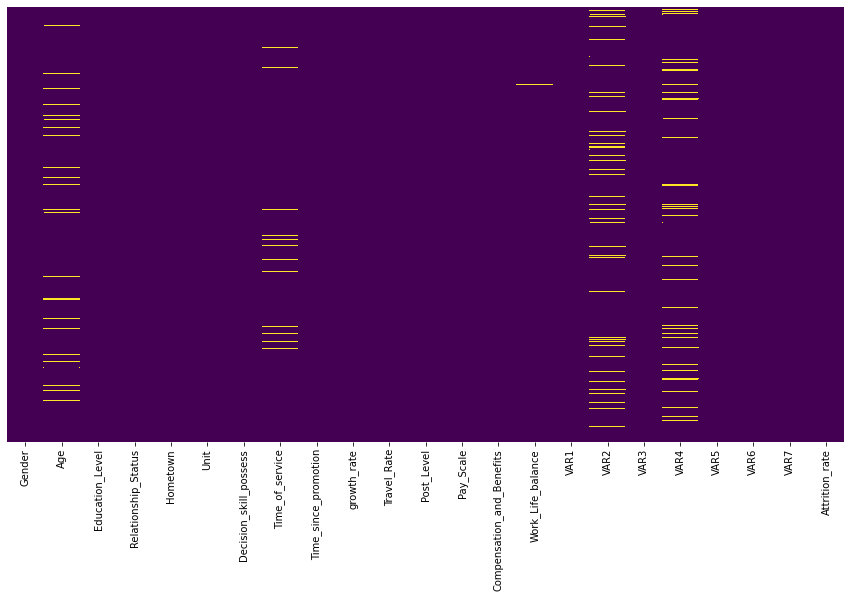

In [169]:
## Heatmap plotting for null values
plt.figure(figsize=(15,8))
sns.heatmap(data=df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

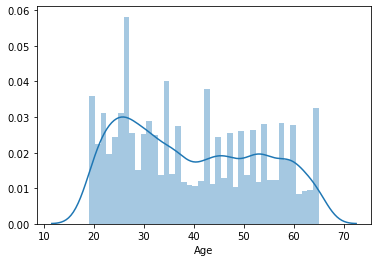

In [170]:
#Distplot for age of people
sns.distplot(df['Age'].dropna(),bins=40,kde=True)

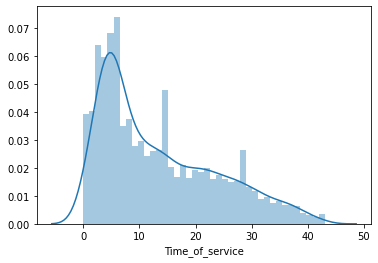

In [171]:
#Distplot for Time of service of people
sns.distplot(df['Time_of_service'].dropna(),bins=40,kde=True)

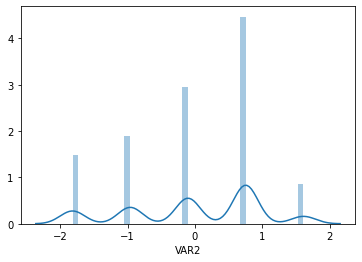

In [172]:
#Distplot for VAR2
sns.distplot(df['VAR2'].dropna(),bins=40,kde=True)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


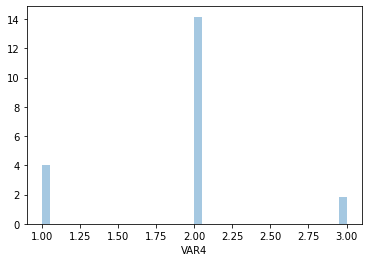

In [173]:
#Distplot for VAR4
sns.distplot(df['VAR4'].dropna(),bins=40,kde=True)

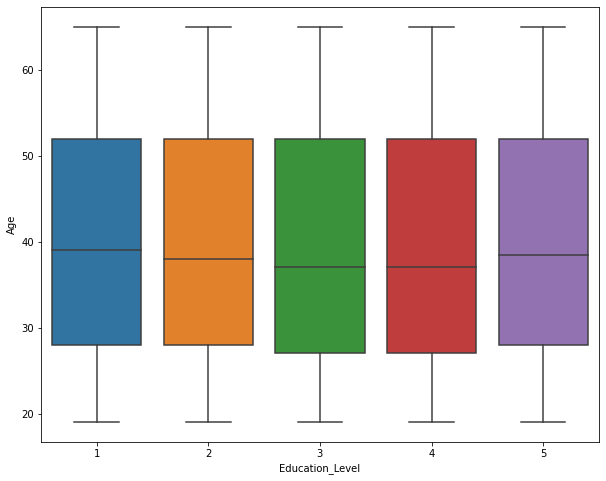

In [174]:
#Age Column
#Lets first check if age has any relation wrt pclass via boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='Education_Level',y='Age',data=df)

Here we can see average age for<br> 
Education_Level 1 = 39<br>
Education_Level 2 = 38<br>
Education_Level 3 = 37<br>
Education_Level 4 = 37<br>
Education_Level 5 = 38<br>

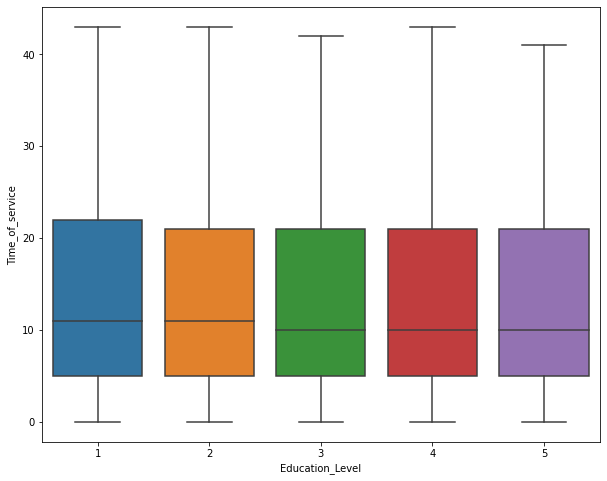

In [175]:
#Time of service Column
#Lets first check if age has any relation wrt pclass via boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x='Education_Level',y='Time_of_service',data=df)

Here we can see average time of service for<br> 
Education_Level 1 = 11<br>
Education_Level 2 = 11<br>
Education_Level 3 = 10<br>
Education_Level 4 = 10<br>
Education_Level 5 = 10<br>

In [176]:
#Impute Age on dataset
def impute_age(cols):
    Age=cols[0]
    EdLevel=cols[1]
    if pd.isnull(Age):
        if EdLevel==1:
            return 39
        elif EdLevel==2 or EdLevel==5:
            return 38
        else:
            return 47
    return Age           

In [177]:
#Impute Time of service on dataset
def impute_tos(cols):
    tos=cols[0]
    EdLevel=cols[1]
    if pd.isnull(tos):
        if EdLevel==1 or EdLevel==2:
            return 11
        else:
            return 10
    return tos           

In [180]:
df['Age']=df[['Age','Education_Level']].apply(impute_age,axis=1)
df['Time_of_service']=df[['Time_of_service','Education_Level']].apply(impute_tos,axis=1)
df.isnull().sum()

Gender                        0
Age                           0
Education_Level               0
Relationship_Status           0
Hometown                      0
Unit                          0
Decision_skill_possess        0
Time_of_service               0
Time_since_promotion          0
growth_rate                   0
Travel_Rate                   0
Post_Level                    0
Pay_Scale                     9
Compensation_and_Benefits     0
Work_Life_balance            11
VAR1                          0
VAR2                          0
VAR3                          0
VAR4                          0
VAR5                          0
VAR6                          0
VAR7                          0
Attrition_rate                0
dtype: int64

### Filling VAR2 and VAR4 with mean

In [178]:
# df['VAR2'].fillna(df['VAR2'].mean(),inplace=True)
# df['VAR4'].fillna(df['VAR4'].mean(),inplace=True)
df['VAR2'].fillna(df['VAR2'].mode()[0],inplace=True)
df['VAR4'].fillna(df['VAR4'].mode()[0],inplace=True)

In [179]:
df.isnull().sum()

Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                           0
VAR3                           0
VAR4                           0
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [181]:
# # Now since very few nan values remain, we can drop those rows
# df.dropna(inplace=True)
# df.info()

# # Interpolating values for  Payscale and Work Life Balance for test data
# df['Pay_Scale'].interpolate(method ='linear', limit_direction ='forward',inplace=True)
# df['Work_Life_balance'].interpolate(method ='linear', limit_direction ='forward',inplace=True)

df['Pay_Scale'].fillna(df['Pay_Scale'].mode()[0],inplace=True)
df['Work_Life_balance'].fillna(df['Work_Life_balance'].mode()[0],inplace=True)
df.isnull().sum()

Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

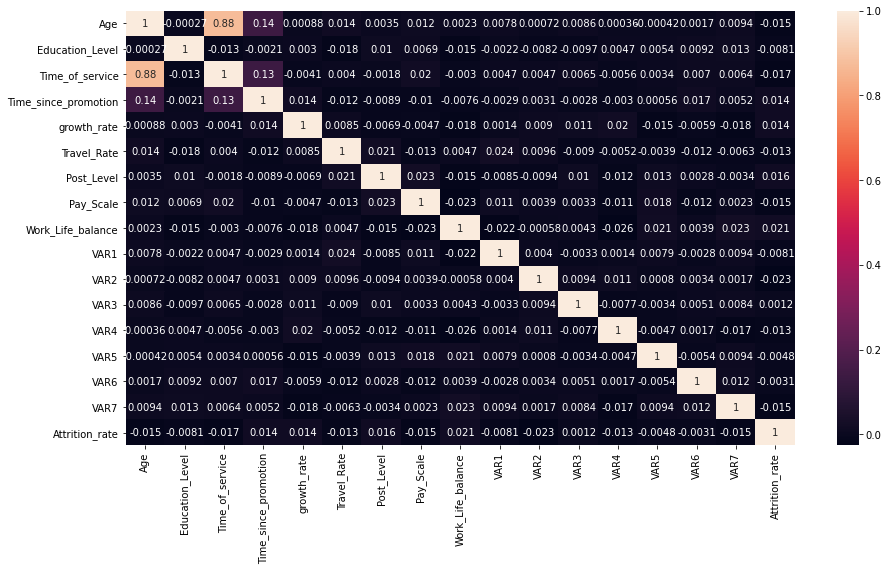

In [182]:
# Correlation Plot
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

# Converting categorical Columns to numerical columns

In [184]:
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [185]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [186]:
#Gender Column
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [187]:
#Relationship_Status Column
df['Relationship_Status']=le.fit_transform(df['Relationship_Status'])
df.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [188]:
#Implementing OneHotEncoding
Hometown=pd.get_dummies(data=df['Hometown'],prefix='Hometown',drop_first=True)
Hometown.head()

,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington
0,1,0,0,0
1,0,0,1,0
2,0,0,0,0
3,0,1,0,0
4,0,0,1,0


In [189]:
Unit=pd.get_dummies(data=df['Unit'],prefix='Unit',drop_first=True)
Unit.head()

,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [190]:
DecisionSkill=pd.get_dummies(data=df['Decision_skill_possess'],prefix='DecSkill',drop_first=True)
DecisionSkill.head()

,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive
0,0,1,0
1,0,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [191]:
Comp=pd.get_dummies(data=df['Compensation_and_Benefits'],prefix='Comp&Benifits',drop_first=True)
Comp.head()

,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [192]:
#Removing The encoded columns from dataframes
df.drop(['Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'],inplace=True,axis=1)
df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0,42.0,4,0,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,1,24.0,3,1,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,0,58.0,3,0,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,0,26.0,3,1,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,0,31.0,1,0,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [193]:
#Concatenation of dataframes with new columns
df=pd.concat([df,Hometown,Unit,DecisionSkill,Comp],axis=1)
df.head()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,DecSkill_Behavioral,DecSkill_Conceptual,DecSkill_Directive,Comp&Benifits_type1,Comp&Benifits_type2,Comp&Benifits_type3,Comp&Benifits_type4
0,0,42.0,4,0,4.0,4,33,1,1,7.0,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,1,24.0,3,1,5.0,4,36,0,3,6.0,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,58.0,3,0,27.0,3,51,0,2,8.0,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
3,0,26.0,3,1,4.0,3,56,1,3,8.0,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,31.0,1,0,5.0,4,62,1,3,2.0,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [194]:
X=df.drop('Attrition_rate',axis=1)
y=df['Attrition_rate']

# Scaling the X data

In [195]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [196]:
X_scaled = scaler.fit_transform(X)

# Train Test Split

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [198]:
# Importing Regressors
from sklearn.linear_model import LinearRegression,Ridge,Lasso,PoissonRegressor,ElasticNet,BayesianRidge
from xgboost import XGBRegressor

# Importing crossvalidations
from sklearn.model_selection import cross_val_score,GridSearchCV

### Linear Regression

In [199]:
linReg=LinearRegression()
mse=cross_val_score(linReg,X_scaled,y,scoring='neg_root_mean_squared_error',cv=10)
mean_mse=np.mean(mse)
print(mean_mse)

-0.18588691640537744


### Ridge Regression

In [200]:
ridge=Ridge()
parameters={'alpha':[1000,1500,1550,1600,1650],'tol':[1e-20,1e-10,1e-5,1e-4,1e-3,1e-2,1e-1,1]}
ridgeReg=GridSearchCV(ridge,parameters,scoring='neg_root_mean_squared_error',cv=10)
ridgeReg.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1000, 1500, 1550, 1600, 1650],
                         'tol': [1e-20, 1e-10, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                                 1]},
             scoring='neg_root_mean_squared_error')

In [201]:
ridgeReg.best_params_

{'alpha': 1650, 'tol': 1e-20}

In [202]:
ridgeReg.best_score_

-0.18544036657925633

### Lasso Regression

In [203]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,70,80,90,100,200,500,1000]}
lassoReg=GridSearchCV(lasso,parameters,scoring='neg_root_mean_squared_error',cv=10)
lassoReg.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 500, 1000]},
             scoring='neg_root_mean_squared_error')

In [204]:
lassoReg.best_params_

{'alpha': 0.001}

In [205]:
lassoReg.best_score_

-0.18550910114416325

### Elastic Net Regression

In [206]:
eNet=ElasticNet()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,70,80,90,100,200,500,1000]}
eNetReg=GridSearchCV(eNet,parameters,scoring='neg_root_mean_squared_error',cv=10)
eNetReg.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 500, 1000]},
             scoring='neg_root_mean_squared_error')

In [207]:
eNetReg.best_params_

{'alpha': 0.01}

In [208]:
eNetReg.best_score_

-0.18552331897194224

### Bayesian Ridge Regression

In [209]:
bRidge=BayesianRidge()
parameters={'alpha_1':[1e-15,1e-20],
           'alpha_2':[1,10,100],
           'lambda_1':[1,0.1,0.01],
           'lambda_2':[1e-5,1e-6]
           }
bRidgeReg=GridSearchCV(bRidge,parameters,scoring='neg_root_mean_squared_error',cv=10)
bRidgeReg.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=BayesianRidge(),
             param_grid={'alpha_1': [1e-15, 1e-20], 'alpha_2': [1, 10, 100],
                         'lambda_1': [1, 0.1, 0.01],
                         'lambda_2': [1e-05, 1e-06]},
             scoring='neg_root_mean_squared_error')

In [210]:
bRidgeReg.best_params_

{'alpha_1': 1e-15, 'alpha_2': 10, 'lambda_1': 0.01, 'lambda_2': 1e-05}

In [211]:
bRidgeReg.best_score_

-0.18546091297103667

### XGBoost Regression

In [212]:
xgbr=XGBRegressor()
parameters={'n_estimators':[10,20,50,100],'booster':['gbtree','dart']}
xgbReg=GridSearchCV(xgbr,parameters,scoring='neg_root_mean_squared_error',cv=10)
xgbReg.fit(X_scaled,y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_par

In [213]:
xgbReg.best_params_

{'booster': 'dart', 'n_estimators': 10}

In [214]:
xgbReg.best_score_

-0.1889426585443428

### Possion Regression

In [215]:
poisson=PoissonRegressor()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,70,80,90,100,200,500,1000]}
poissonReg=GridSearchCV(poisson,parameters,scoring='neg_root_mean_squared_error',cv=10)
poissonReg.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=PoissonRegressor(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90, 100, 200, 500, 1000]},
             scoring='neg_root_mean_squared_error')

In [216]:
poissonReg.best_params_

{'alpha': 0.1}

In [217]:
poissonReg.best_score_

-0.18545308575492075

# Trying Ridge, Lasso, Possion, ElasticNet,Bayesian,XGB Regressors

In [218]:
pred_lasso=lassoReg.predict(X_test)
pred_ridge=ridgeReg.predict(X_test)
pred_poisson=poissonReg.predict(X_test)
pred_eNet=eNetReg.predict(X_test)
pred_bRidge=bRidgeReg.predict(X_test)
pred_xgb=xgbReg.predict(X_test)

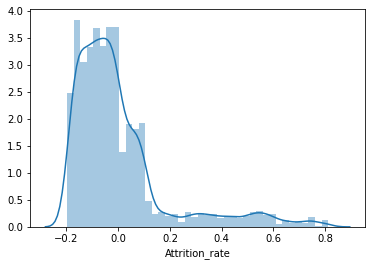

In [219]:
sns.distplot(y_test-pred_lasso)

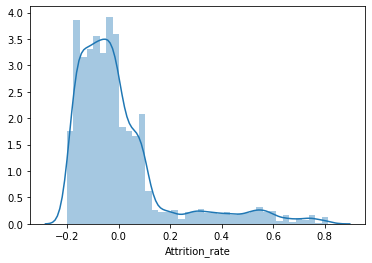

In [220]:
sns.distplot(y_test-pred_ridge)

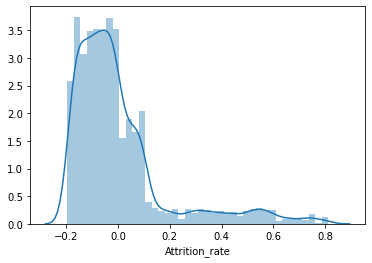

In [221]:
sns.distplot(y_test-pred_poisson)

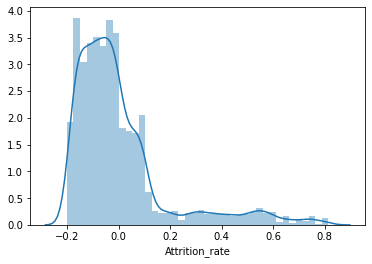

In [222]:
sns.distplot(y_test-pred_bRidge)

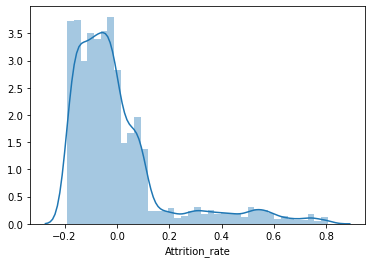

In [223]:
sns.distplot(y_test-pred_eNet)

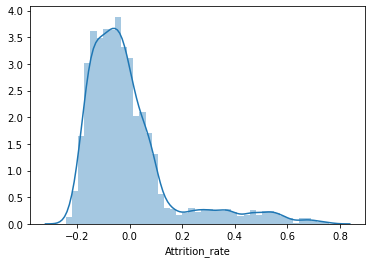

In [224]:
sns.distplot(y_test-pred_xgb)

# RMSEs

In [225]:
from sklearn.metrics import mean_squared_error as mse
import math

In [226]:
# Ridge Regression
math.sqrt(mse(y_test,pred_ridge))

0.18964476461620788

In [227]:
# Lasso Regression
math.sqrt(mse(y_test,pred_lasso))

0.1899160058758724

In [228]:
# Poisson Regression
math.sqrt(mse(y_test,pred_poisson))

0.18986633859466623

In [229]:
# Bayesian Ridge Regression
math.sqrt(mse(y_test,pred_bRidge))

0.18966933951956022

In [230]:
# Elastic Net Regression
math.sqrt(mse(y_test,pred_eNet))

0.19022456455719117

In [231]:
# XGB Regression
math.sqrt(mse(y_test,pred_xgb))

0.16935512920045478